In [ ]:
!pip install scikit-learn
!pip install pandas
!pip install emoji
!pip install num2words
!pip install nltk
!pip install matplotlib
!pip install wordcloud
!pip install python-docx
!pip install ipynb
!pip install seaborn
!pip install unidecode
!pip install python-docx
import docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 4.9 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13704 sha256=013535c092d9bdf3158b66384d8da975823d4516c369a000d34cfa9471d5e493
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.5 MB/s eta 0:00:00


In [ ]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import emoji
from num2words import num2words
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
nltk.download('stopwords')
nltk.download('wordnet')
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter
from matplotlib import colors
from wordcloud import WordCloud
from sklearn import metrics
import docx
from ipynb.fs.full.preprocessor_class import Preprocessor
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
train_data = pd.read_csv('data/shuffled_train_data.csv',index_col=None)
train_labels = pd.read_csv('data/shuffled_train_labels.csv',index_col=None)

test_data = pd.read_csv('data/test_data.csv',index_col=None)
test_labels = pd.read_csv('data/test_labels.csv',index_col=None)

train_data.shape

(2100, 1)

In [ ]:
preprocessor = Preprocessor(set(stopwords.words('romanian')),None, None, True, True, True, True, False, True, True, True, True, False, False)

preprocessed_data = pd.DataFrame(columns=['text'])

preprocessed_train_data = pd.DataFrame(columns=['text'])
preprocessed_test_data = pd.DataFrame(columns=['text'])

preprocessed_train_data['text'] = train_data.apply(lambda row: preprocessor.preprocess(row.iloc[0]), axis = 1)
preprocessed_test_data['text'] = test_data.apply(lambda row: preprocessor.preprocess(row.iloc[0]), axis = 1)

In [ ]:
preprocessed_test_data['text'] = preprocessed_test_data['text'].apply(lambda x: ' '.join(map(str, x)))
preprocessed_test_data

,text
0,mare durere fizica simtita clasa ten stomatolo...
1,petitie asf impotriva speculei asiguratorilor ...
2,ride sharing plecat proteste redditori masini ...
3,apasa trimite refugiat sprit ten salvati gold ...
4,politia datoria scurt depus plangere politie m...
...,...
1320,sfat buna neboie sfat facut doza vaccin contra...
1321,boli mintale soferii tir dn1 locuit an jumatat...
1322,freelancer gasesc clienti gasesc client job fr...
1323,furata cunostinta spune probe suficiente furat...


In [ ]:
preprocessed_train_data['text'] = preprocessed_train_data['text'].apply(lambda x: ' '.join(map(str, x)))
preprocessed_train_data

,text
0,rant ajuns cumparam originalul postare tip imp...
1,true grit secretul succesului evident ideile c...
2,experiente schimbat mentalitatea buna experien...
3,subreddit trebui numeasca r depresie casual ti...
4,ticalosilor entr acte unchiul scrie decat marc...
...,...
2095,mersul sala eticheta mno inceput merg sala tov...
2096,maine sala controla emotiile long story short ...
2097,stie gasesc granita italiana intors sicilia ma...
2098,somn permanenta stiu fac efectiv somn momentul...


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [252]:
#test custom thresholds for the best parameters
sm = SMOTE(random_state=42)
chosen_parameters = {'max_features': 5000, 'n_gram': (1, 1), 'solver': 'liblinear', 'tol': 0.3, 'C': 0.3}
tfidf = TfidfVectorizer(max_features = chosen_parameters["max_features"], ngram_range = chosen_parameters["n_gram"])

X_train_tfidf = tfidf.fit_transform(preprocessed_train_data["text"]).toarray()
X_test_tfidf = tfidf.transform(preprocessed_test_data["text"]).toarray()
X_res, y_res = sm.fit_resample(X_train_tfidf, train_labels) # Use tfidf data for SMOTE

model = LogisticRegression(solver = chosen_parameters["solver"], tol = chosen_parameters["tol"], C = chosen_parameters["C"])

model.fit(X_res, y_res)
predictions = model.predict_proba(X_test_tfidf)
print(predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[0.44721649 0.31538508 0.23739843]
 [0.51167105 0.35588166 0.13244728]
 [0.46221823 0.27890598 0.25887578]
 ...
 [0.15458741 0.42384945 0.42156314]
 [0.40061086 0.43018713 0.16920201]
 [0.41354053 0.45990357 0.1265559 ]]


[0.5, 0.4, 0.3]
                     precision    recall  f1-score   support

      no_depression       0.84      0.72      0.78      1000
possible_depression       0.32      0.38      0.34       250
    true_depression       0.20      0.45      0.27        75

           accuracy                           0.64      1325
          macro avg       0.45      0.52      0.46      1325
       weighted avg       0.71      0.64      0.67      1325



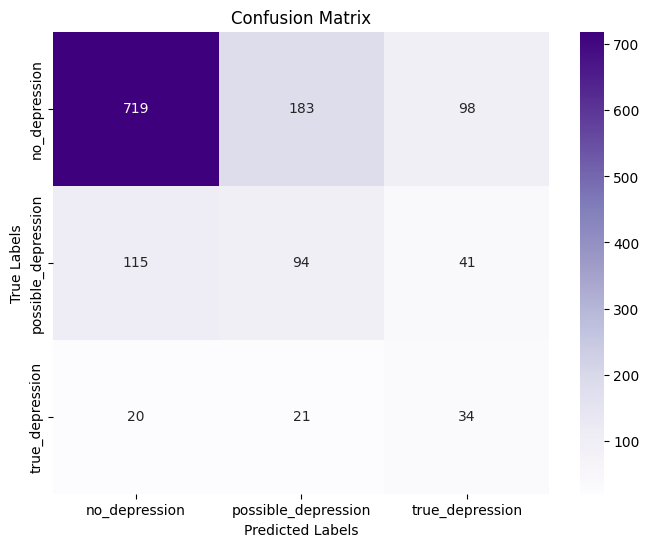

-------------------------------------------
[0.4, 0.3, 0.3]
                     precision    recall  f1-score   support

      no_depression       0.82      0.79      0.80      1000
possible_depression       0.32      0.27      0.30       250
    true_depression       0.20      0.43      0.27        75

           accuracy                           0.67      1325
          macro avg       0.45      0.50      0.46      1325
       weighted avg       0.69      0.67      0.68      1325



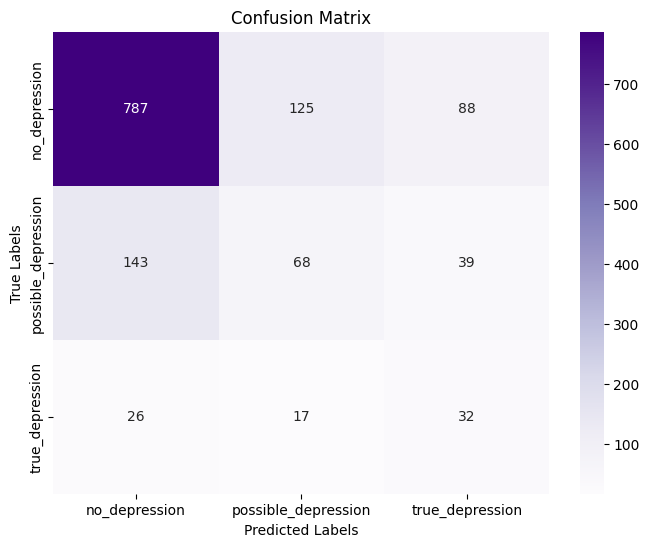

-------------------------------------------
[0.5, 0.37, 0.27]
                     precision    recall  f1-score   support

      no_depression       0.86      0.63      0.73      1000
possible_depression       0.29      0.45      0.36       250
    true_depression       0.18      0.51      0.26        75

           accuracy                           0.59      1325
          macro avg       0.44      0.53      0.45      1325
       weighted avg       0.72      0.59      0.63      1325



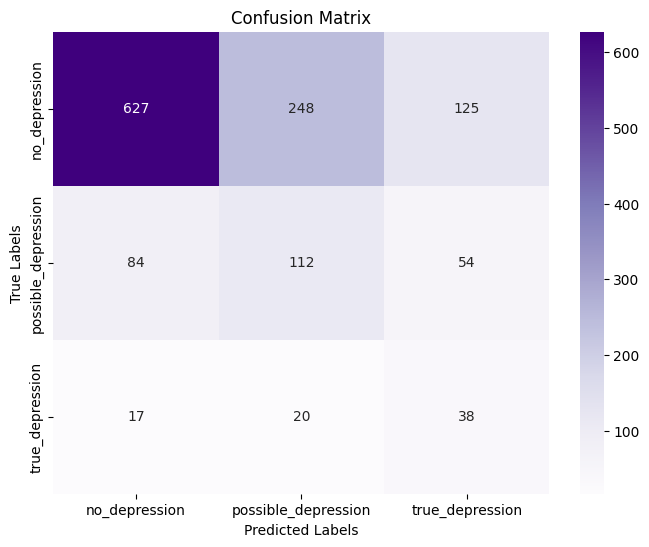

-------------------------------------------
[0.45, 0.37, 0.27]
                     precision    recall  f1-score   support

      no_depression       0.84      0.71      0.77      1000
possible_depression       0.32      0.35      0.33       250
    true_depression       0.18      0.49      0.26        75

           accuracy                           0.63      1325
          macro avg       0.45      0.52      0.46      1325
       weighted avg       0.71      0.63      0.66      1325



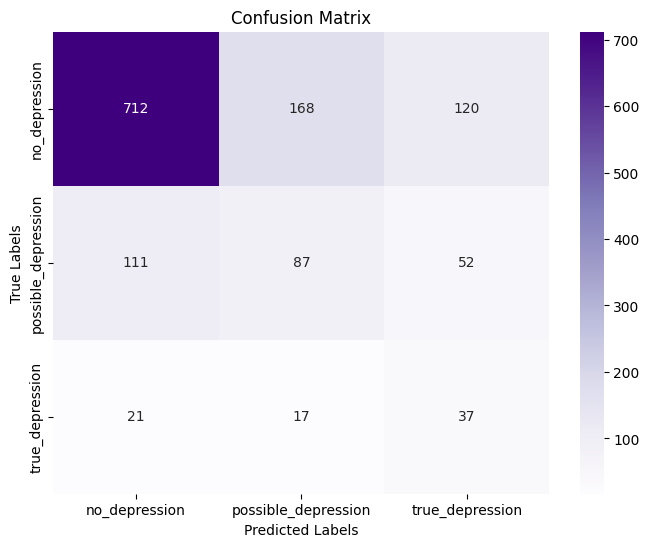

-------------------------------------------


In [267]:
import numpy as np

thresholds_values = [[0.5, 0.4, 0.3], [0.4, 0.3, 0.3], [0.5, 0.37, 0.27], [0.45, 0.37, 0.27]]

for thresholds in thresholds_values:
     print(thresholds)
     y_pred_custom = np.zeros(predictions.shape[0])

     for i in range(predictions.shape[0]):
         if predictions[i, 0] >= thresholds[0]:
             y_pred_custom[i] = 0
         elif predictions[i, 2] >= thresholds[2]:
             y_pred_custom[i] = 2
         elif predictions[i, 1] >= thresholds[1]:
             y_pred_custom[i] = 1
         else:
             y_pred_custom[i] = np.argmax(predictions[i])

     labels =[]
     for el in y_pred_custom:
       if el == 0:
         labels.append("no_depression")
       elif el == 1:
         labels.append("possible_depression")
       else:
         labels.append("true_depression")
     print(classification_report(test_labels['label'], labels))
     conf_matrix = confusion_matrix(test_labels['label'], labels)

     plt.figure(figsize=(8, 6))
     sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels = ['no_depression', 'possible_depression', 'true_depression'], yticklabels = ['no_depression', 'possible_depression', 'true_depression'])
     plt.xlabel('Predicted Labels')
     plt.ylabel('True Labels')
     plt.title('Confusion Matrix')
     plt.show()

     print("-------------------------------------------")